# =========================
# Step 1: Upload & Extract Dataset
# =========================

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving 377 images for Brian Tumor MRI Images.zip to 377 images for Brian Tumor MRI Images (3).zip


# Extract them to separate folders

In [ ]:
import zipfile

for filename in uploaded.keys():
    foldername = filename.split('.')[0].replace(' ', '_').lower() + "_dataset"
    with zipfile.ZipFile(filename, 'r') as zip_ref:
        zip_ref.extractall(foldername)
    print(f"✅ Extracted {filename} to {foldername}")

✅ Extracted 377 images for Brian Tumor MRI Images (3).zip to 377_images_for_brian_tumor_mri_images_(3)_dataset


#Inspect extracted folders

In [ ]:
import os

# Automatically list all *_dataset folders
dataset_folders = [d for d in os.listdir() if d.endswith('_dataset') and os.path.isdir(d)]

for folder in dataset_folders:
    print(f"\n📁 Inspecting: {folder}")
    for root, dirs, files in os.walk(folder):
        print("📂", root)
        for file in files[:5]:
            print("   └──", file)


📁 Inspecting: 377_images_for_brian_tumor_mri_images_(2)_dataset
📂 377_images_for_brian_tumor_mri_images_(2)_dataset
📂 377_images_for_brian_tumor_mri_images_(2)_dataset/377 images for Brian Tumor MRI Images
📂 377_images_for_brian_tumor_mri_images_(2)_dataset/377 images for Brian Tumor MRI Images/Training
📂 377_images_for_brian_tumor_mri_images_(2)_dataset/377 images for Brian Tumor MRI Images/Training/Glioma
   └── G_888_VF_.jpg
   └── G_803.jpg
   └── G_805.jpg
   └── G_884_RO_.jpg
   └── G_803_DA_.jpg
📂 377_images_for_brian_tumor_mri_images_(2)_dataset/377 images for Brian Tumor MRI Images/Training/Meningioma
   └── M_885_DA_.jpg
   └── M_886_HF_.jpg
   └── M_878_HF_.jpg
   └── M_879_DA_.jpg
   └── M_886_RO_.jpg
📂 377_images_for_brian_tumor_mri_images_(2)_dataset/377 images for Brian Tumor MRI Images/Training/Pituitary
   └── P_843.jpg
   └── P_838_DA_.jpg
   └── P_840_DA_.jpg
   └── P_844_HF_.jpg
   └── P_835.jpg
📂 377_images_for_brian_tumor_mri_images_(2)_dataset/377 images for Bri

#Load & Preprocess Dataset

In [ ]:
import os
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import torch

# Define image size (Swin-tiny default is 224x224)
IMG_SIZE = 224
BATCH_SIZE = 16

# ✅ Data augmentation (only for training set)
train_transform = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.RandomHorizontalFlip(p=0.5),   # Flip left-right
    transforms.RandomRotation(15),            # Rotate within ±15 degrees
    transforms.RandomAffine(degrees=0, translate=(0.05, 0.05)),  # Small translation
    transforms.ColorJitter(brightness=0.1, contrast=0.1),        # Slight intensity shift
    transforms.RandomResizedCrop(IMG_SIZE, scale=(0.9, 1.0)),    # Random zoom-in
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])  # For grayscale MRI
])

# ✅ No augmentation for test set
test_transform = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])

# Paths
train_dir = '377_images_for_brian_tumor_mri_images_dataset/377 images for Brian Tumor MRI Images/Training'
test_dir = '377_images_for_brian_tumor_mri_images_dataset/377 images for Brian Tumor MRI Images/Testing'

# Load datasets
train_dataset = datasets.ImageFolder(train_dir, transform=train_transform)
test_dataset = datasets.ImageFolder(test_dir, transform=test_transform)

# Dataloaders
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

# Class mapping
class_names = train_dataset.classes
print("✅ Classes:", class_names)


✅ Classes: ['Glioma', 'Meningioma', 'No_Tumor', 'Pituitary']


#Visualize Sample Images

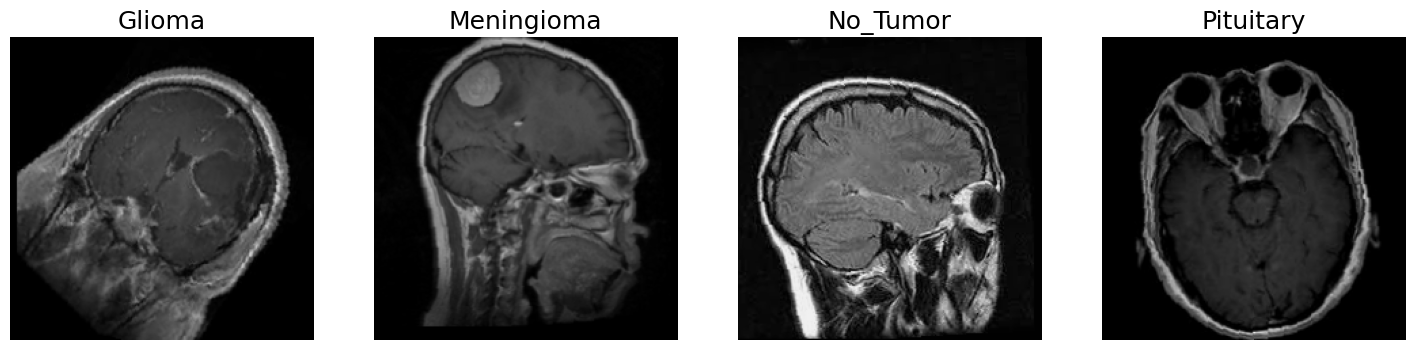

In [ ]:
import torchvision
import matplotlib.pyplot as plt
import numpy as np

def imshow(img, title):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)), cmap='gray')
    plt.title(title, fontsize=18)   # <-- font size set to 18
    plt.axis('off')

# Find one image per class
examples = {}
for img, label in train_dataset:
    if label not in examples:
        examples[label] = img
    if len(examples) == len(class_names):
        break

# Prepare images and titles sorted by label index
imgs = [examples[i] for i in range(len(class_names))]
titles = [class_names[i] for i in range(len(class_names))]

# Show images in one grid
plt.figure(figsize=(18, 4))
for i in range(len(class_names)):
    plt.subplot(1, len(class_names), i + 1)
    imshow(imgs[i], titles[i])
plt.show()

# let's check shap is install or not ==> SHAP is Install or not !!!



In [ ]:
import shap
print(shap.__version__)

0.48.0


# SHAP Explainability for Tumor vs No_Tumor
## ==> step 1 :  Data Preparation & Loading
---------------------------------------------------
### Loaded brain MRI images of Glioma, Meningioma, Pituitary, and No_Tumor.
### Applied resizing, normalization, and converted grayscale images to 3 channels for ResNet.
### Created PyTorch DataLoader for the test dataset.

## ==> step 2: Model Setup
---------------------------------------------------

### Used pretrained ResNet-18, modified the final fully connected layer for 4 classes.
### Wrapped the model into TumorWrapper to merge all tumor classes into a single binary class (Tumor vs No_Tumor).

## ==>step 3: Image Selection for SHAP
-----------------------------------------------------
### Used pretrained ResNet-18, modified the final fully connected layer for 4 classes.
### Wrapped the model into TumorWrapper to merge all tumor classes into a single binary class (Tumor vs No_Tumor).

## ==> step 4 : Image Selection for SHAP
--------------------------------------------------
### Selected one image per binary class (Tumor and No_Tumor) for explanation.
### Prepared a small background set for SHAP (only the selected 2 images).

## ==> step 5: Prediction Inspection
-------------------------------------------------
### Computed predicted probabilities for the selected images.
### Printed true vs predicted probabilities to validate the explanation.

Classes: ['Glioma', 'Meningioma', 'No_Tumor', 'Pituitary']
Selected images for explanation: torch.Size([2, 3, 224, 224])


/tmp/ipython-input-2036832349.py:170: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


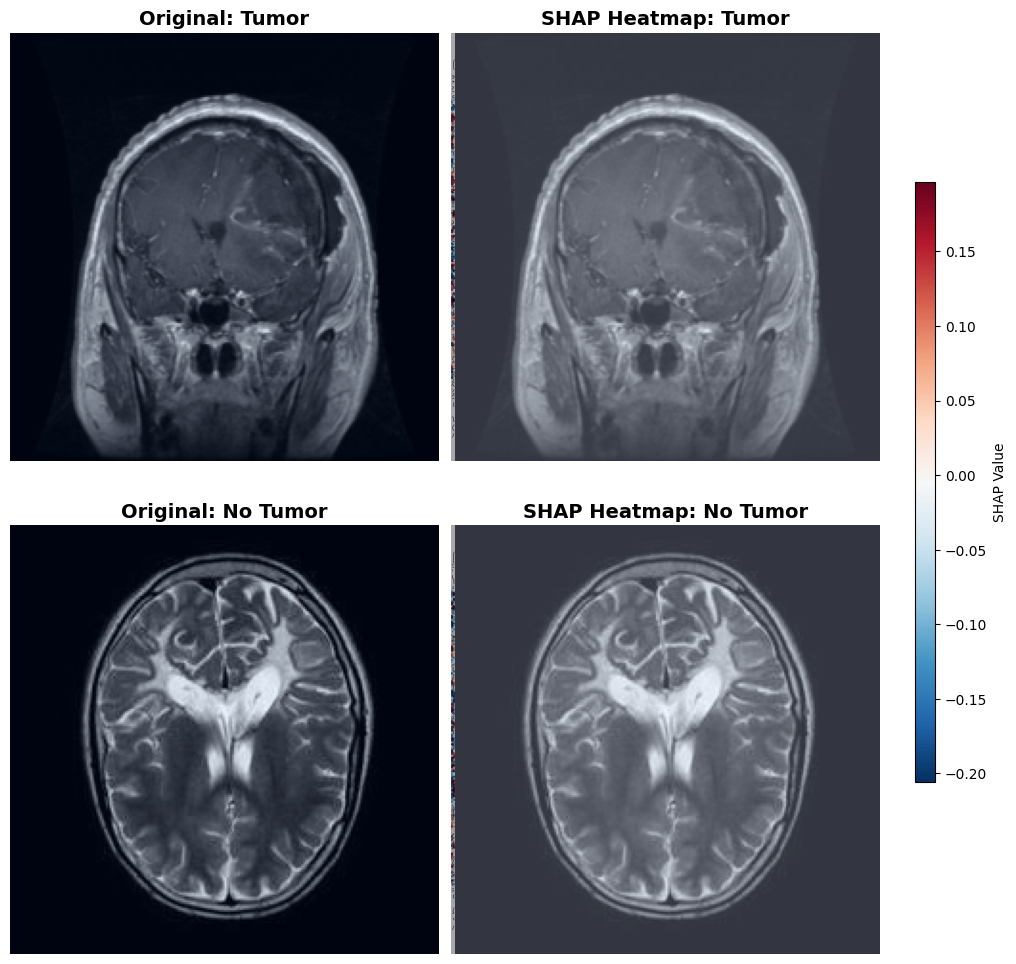

Image 0: true=Tumor, pred_probs=[0.667 0.333]
Image 1: true=No_Tumor, pred_probs=[0.422 0.578]


In [ ]:
# =========================
# Full SHAP Pipeline + Publication-Style Visualization
# =========================
import torch
import torch.nn as nn
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from torchvision.models import resnet18, ResNet18_Weights
import shap
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib import colors
import numpy as np

# -------------------------
# Settings
# -------------------------
train_dir = '377_images_for_brian_tumor_mri_images_dataset/377 images for Brian Tumor MRI Images/Training'
test_dir  = '377_images_for_brian_tumor_mri_images_dataset/377 images for Brian Tumor MRI Images/Testing'
IMG_SIZE = 224
BATCH_SIZE = 16
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# -------------------------
# Transforms
# -------------------------
transform = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.ToTensor(),
    transforms.Lambda(lambda t: t.repeat(3,1,1) if t.shape[0]==1 else t),
    transforms.Normalize(mean=(0.485,0.456,0.406), std=(0.229,0.224,0.225))
])

# -------------------------
# Dataset & Loader
# -------------------------
train_dataset = datasets.ImageFolder(train_dir, transform=transform)
test_dataset  = datasets.ImageFolder(test_dir, transform=transform)
test_loader   = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

class_names = train_dataset.classes
print("Classes:", class_names)

# -------------------------
# Base Model
# -------------------------
weights = ResNet18_Weights.DEFAULT
model = resnet18(weights=weights)
model.fc = nn.Linear(model.fc.in_features, len(class_names))
for m in model.modules():
    if isinstance(m, nn.ReLU) and getattr(m, "inplace", False):
        m.inplace = False
model = model.to(DEVICE)
model.eval()

# -------------------------
# Select one Tumor & one No_Tumor image
# -------------------------
tumor_classes = ['Glioma', 'Meningioma', 'Pituitary']
tumor_idx = [class_names.index(c) for c in tumor_classes]
no_tumor_idx = class_names.index('No_Tumor')

selected_images, selected_labels = [], []

for images, labels in test_loader:
    for i, lbl in enumerate(labels):
        if lbl.item() in tumor_idx and 0 not in selected_labels:
            selected_images.append(images[i].unsqueeze(0))
            selected_labels.append(0)  # Tumor
        elif lbl.item() == no_tumor_idx and 1 not in selected_labels:
            selected_images.append(images[i].unsqueeze(0))
            selected_labels.append(1)  # No_Tumor
    if len(selected_labels) == 2:
        break

to_explain = torch.cat(selected_images, dim=0).to(DEVICE)
print("Selected images for explanation:", to_explain.shape)

# -------------------------
# Wrap model: merge Tumor classes
# -------------------------
class TumorWrapper(nn.Module):
    def __init__(self, model, tumor_idx, no_tumor_idx):
        super().__init__()
        self.model = model
        self.tumor_idx = tumor_idx
        self.no_tumor_idx = no_tumor_idx

    def forward(self, x):
        logits = self.model(x)
        tumor_sum = logits[:, self.tumor_idx].sum(dim=1, keepdim=True)
        no_tumor = logits[:, self.no_tumor_idx].unsqueeze(1)
        return torch.cat([tumor_sum, no_tumor], dim=1)

model2 = TumorWrapper(model, tumor_idx, no_tumor_idx).to(DEVICE)
model2.eval()

# -------------------------
# Background for SHAP
# -------------------------
background = to_explain.detach()

# -------------------------
# SHAP GradientExplainer
# -------------------------
explainer = shap.GradientExplainer(model2, background)
shap_values = explainer.shap_values(to_explain, nsamples=10)

# -------------------------
# Convert SHAP outputs to numpy
# -------------------------
to_explain_np = to_explain.cpu().numpy().transpose(0,2,3,1)

shap_values_np = []
for sv in shap_values:
    sv = np.array(sv)
    if sv.ndim == 3:
        sv = np.expand_dims(sv, 0)
    sv_list = []
    for i in range(sv.shape[0]):
        sv_hwc = sv[i].transpose(1,2,0)
        if sv_hwc.shape[2] != 3:
            sv_hwc = np.mean(sv_hwc, axis=2, keepdims=True).repeat(3, axis=2)
        sv_list.append(sv_hwc)
    shap_values_np.append(np.stack(sv_list, axis=0))

# -------------------------
# Publication-Style Visualization
# -------------------------
titles = ["Tumor", "No Tumor"]

# Compute global vmin/vmax
all_vals = []
for i in range(len(to_explain_np)):
    sv = shap_values_np[0][i]
    all_vals.append(np.mean(sv, axis=2).ravel())
all_vals = np.concatenate(all_vals)
vmin, vmax = np.percentile(all_vals * 1000, [5, 95])

fig, axes = plt.subplots(len(to_explain_np), 2, figsize=(10, 5*len(to_explain_np)))
if len(to_explain_np) == 1:
    axes = np.expand_dims(axes, 0)

for i in range(len(to_explain_np)):
    img = to_explain_np[i]
    img = (img - img.min()) / (img.max() - img.min())

    shap_val = shap_values_np[0][i]
    shap_val = np.mean(shap_val, axis=2) * 1000

    # Original
    axes[i,0].imshow(img)
    axes[i,0].axis('off')
    axes[i,0].set_title(f"Original: {titles[i]}", fontsize=14, fontweight="bold")

    # SHAP overlay
    axes[i,1].imshow(img, alpha=0.8)
    im = axes[i,1].imshow(shap_val, cmap='RdBu_r', alpha=0.6, vmin=vmin, vmax=vmax)
    cs = axes[i,1].contour(shap_val, levels=5, colors='black', linewidths=0.5, alpha=0.7)
    axes[i,1].clabel(cs, inline=True, fontsize=8, fmt="%.1f")
    axes[i,1].axis('off')
    axes[i,1].set_title(f"SHAP Heatmap: {titles[i]}", fontsize=14, fontweight="bold")

# Shared colorbar
cbar_ax = fig.add_axes([0.92, 0.2, 0.02, 0.6])
norm = colors.Normalize(vmin=vmin, vmax=vmax)
fig.colorbar(cm.ScalarMappable(norm=norm, cmap='RdBu_r'),
             cax=cbar_ax, label="SHAP Value")

plt.tight_layout(rect=[0, 0, 0.9, 1])
plt.savefig("shap_visualization.png", dpi=400, bbox_inches="tight")
plt.show()

# -------------------------
# Predicted probabilities
# -------------------------
with torch.no_grad():
    preds = model2(to_explain).softmax(dim=1).cpu().numpy()

for i in range(len(to_explain_np)):
    label_name = "Tumor" if selected_labels[i] == 0 else "No_Tumor"
    print(f"Image {i}: true={label_name}, pred_probs={np.round(preds[i],3)}")
